# DPA - Project 

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocecing
---

In [31]:
to_keep=10000

In [32]:
application_data = pd.read_csv('../data/application_record.csv')
credit_data = pd.read_csv('../data/credit_record.csv')

merged_data = pd.merge(application_data, credit_data, on='ID', how='inner')

data = merged_data.dropna()
data.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,C


In [33]:
data['CODE_GENDER'] = data['CODE_GENDER'].replace({'F': 1, 'M': 0})

data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})

data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].replace({
    'Higher education': 1,
    'Secondary / secondary special': 2, 
    'Incomplete higher': 3,
    'Lower secondary': 4,
    'Academic degree': 5
})

data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace({
    'Married': 1,
    'Single / not married': 2,
    'Civil marriage': 3,
    'Widow': 4,
    'Separated': 5
})

data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 1,
    'With parents': 2,
    'Rented apartment': 3,
    'Municipal apartment': 4,
    'Office apartment': 5,
    'Co-op apartment': 6
})

data = data.drop(columns=['OCCUPATION_TYPE'])
data = data.drop(columns=['NAME_INCOME_TYPE'])
data = data.drop(columns=['FLAG_MOBIL'])
data = data.drop(columns=['ID'])



C:\Users\paula\AppData\Local\Temp\ipykernel_14580\3008581273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CODE_GENDER'] = data['CODE_GENDER'].replace({'F': 1, 'M': 0})
C:\Users\paula\AppData\Local\Temp\ipykernel_14580\3008581273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
C:\Users\paula\AppData\Local\Temp\ipykernel_14580\3008581273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [34]:
status_mapping = {
    'C': 0,  # Paid off that month
    'X': 0,  # No loan for the month
    '0': 1,  # 1-29 days past due
    '1': 2,  # 30-59 days past due
    '2': 3,  # 60-89 days overdue
    '3': 4,  # 90-119 days overdue
    '4': 5,  # 120-149 days overdue
    '5': 6   # Overdue or bad debts for more than 150 days
}

data['STATUS'] = data['STATUS'].replace(status_mapping)

print(data['STATUS'].value_counts())


STATUS
0    328352
1    200930
2      6423
6      1087
3       542
4       181
5       152
Name: count, dtype: int64


In [35]:

data = data.sample(n=to_keep, random_state=42)
# For quick execution during testing

In [36]:
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
211130,0,0,1,0,135000.0,2,2,1,-17479,-2238,1,0,0,1.0,-1,0
576809,1,1,1,0,135000.0,2,1,1,-16548,-1350,0,0,0,2.0,0,1
35646,1,0,0,0,94500.0,2,4,3,-22265,-829,0,0,1,1.0,-17,0
250224,1,0,0,1,99000.0,2,1,1,-15448,-8140,1,1,0,3.0,-11,1
490602,1,0,0,0,270000.0,2,1,1,-14023,-1070,0,1,0,2.0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361059,1,1,1,0,391500.0,2,1,1,-16995,-7264,0,0,0,2.0,-39,0
578893,1,0,1,0,157500.0,1,1,1,-20163,-223,1,1,0,2.0,-38,0
255745,1,0,0,0,144000.0,2,2,1,-15773,-2509,0,0,0,1.0,-1,0
540233,0,0,1,2,450000.0,1,1,1,-12238,-2187,1,1,0,4.0,-16,0


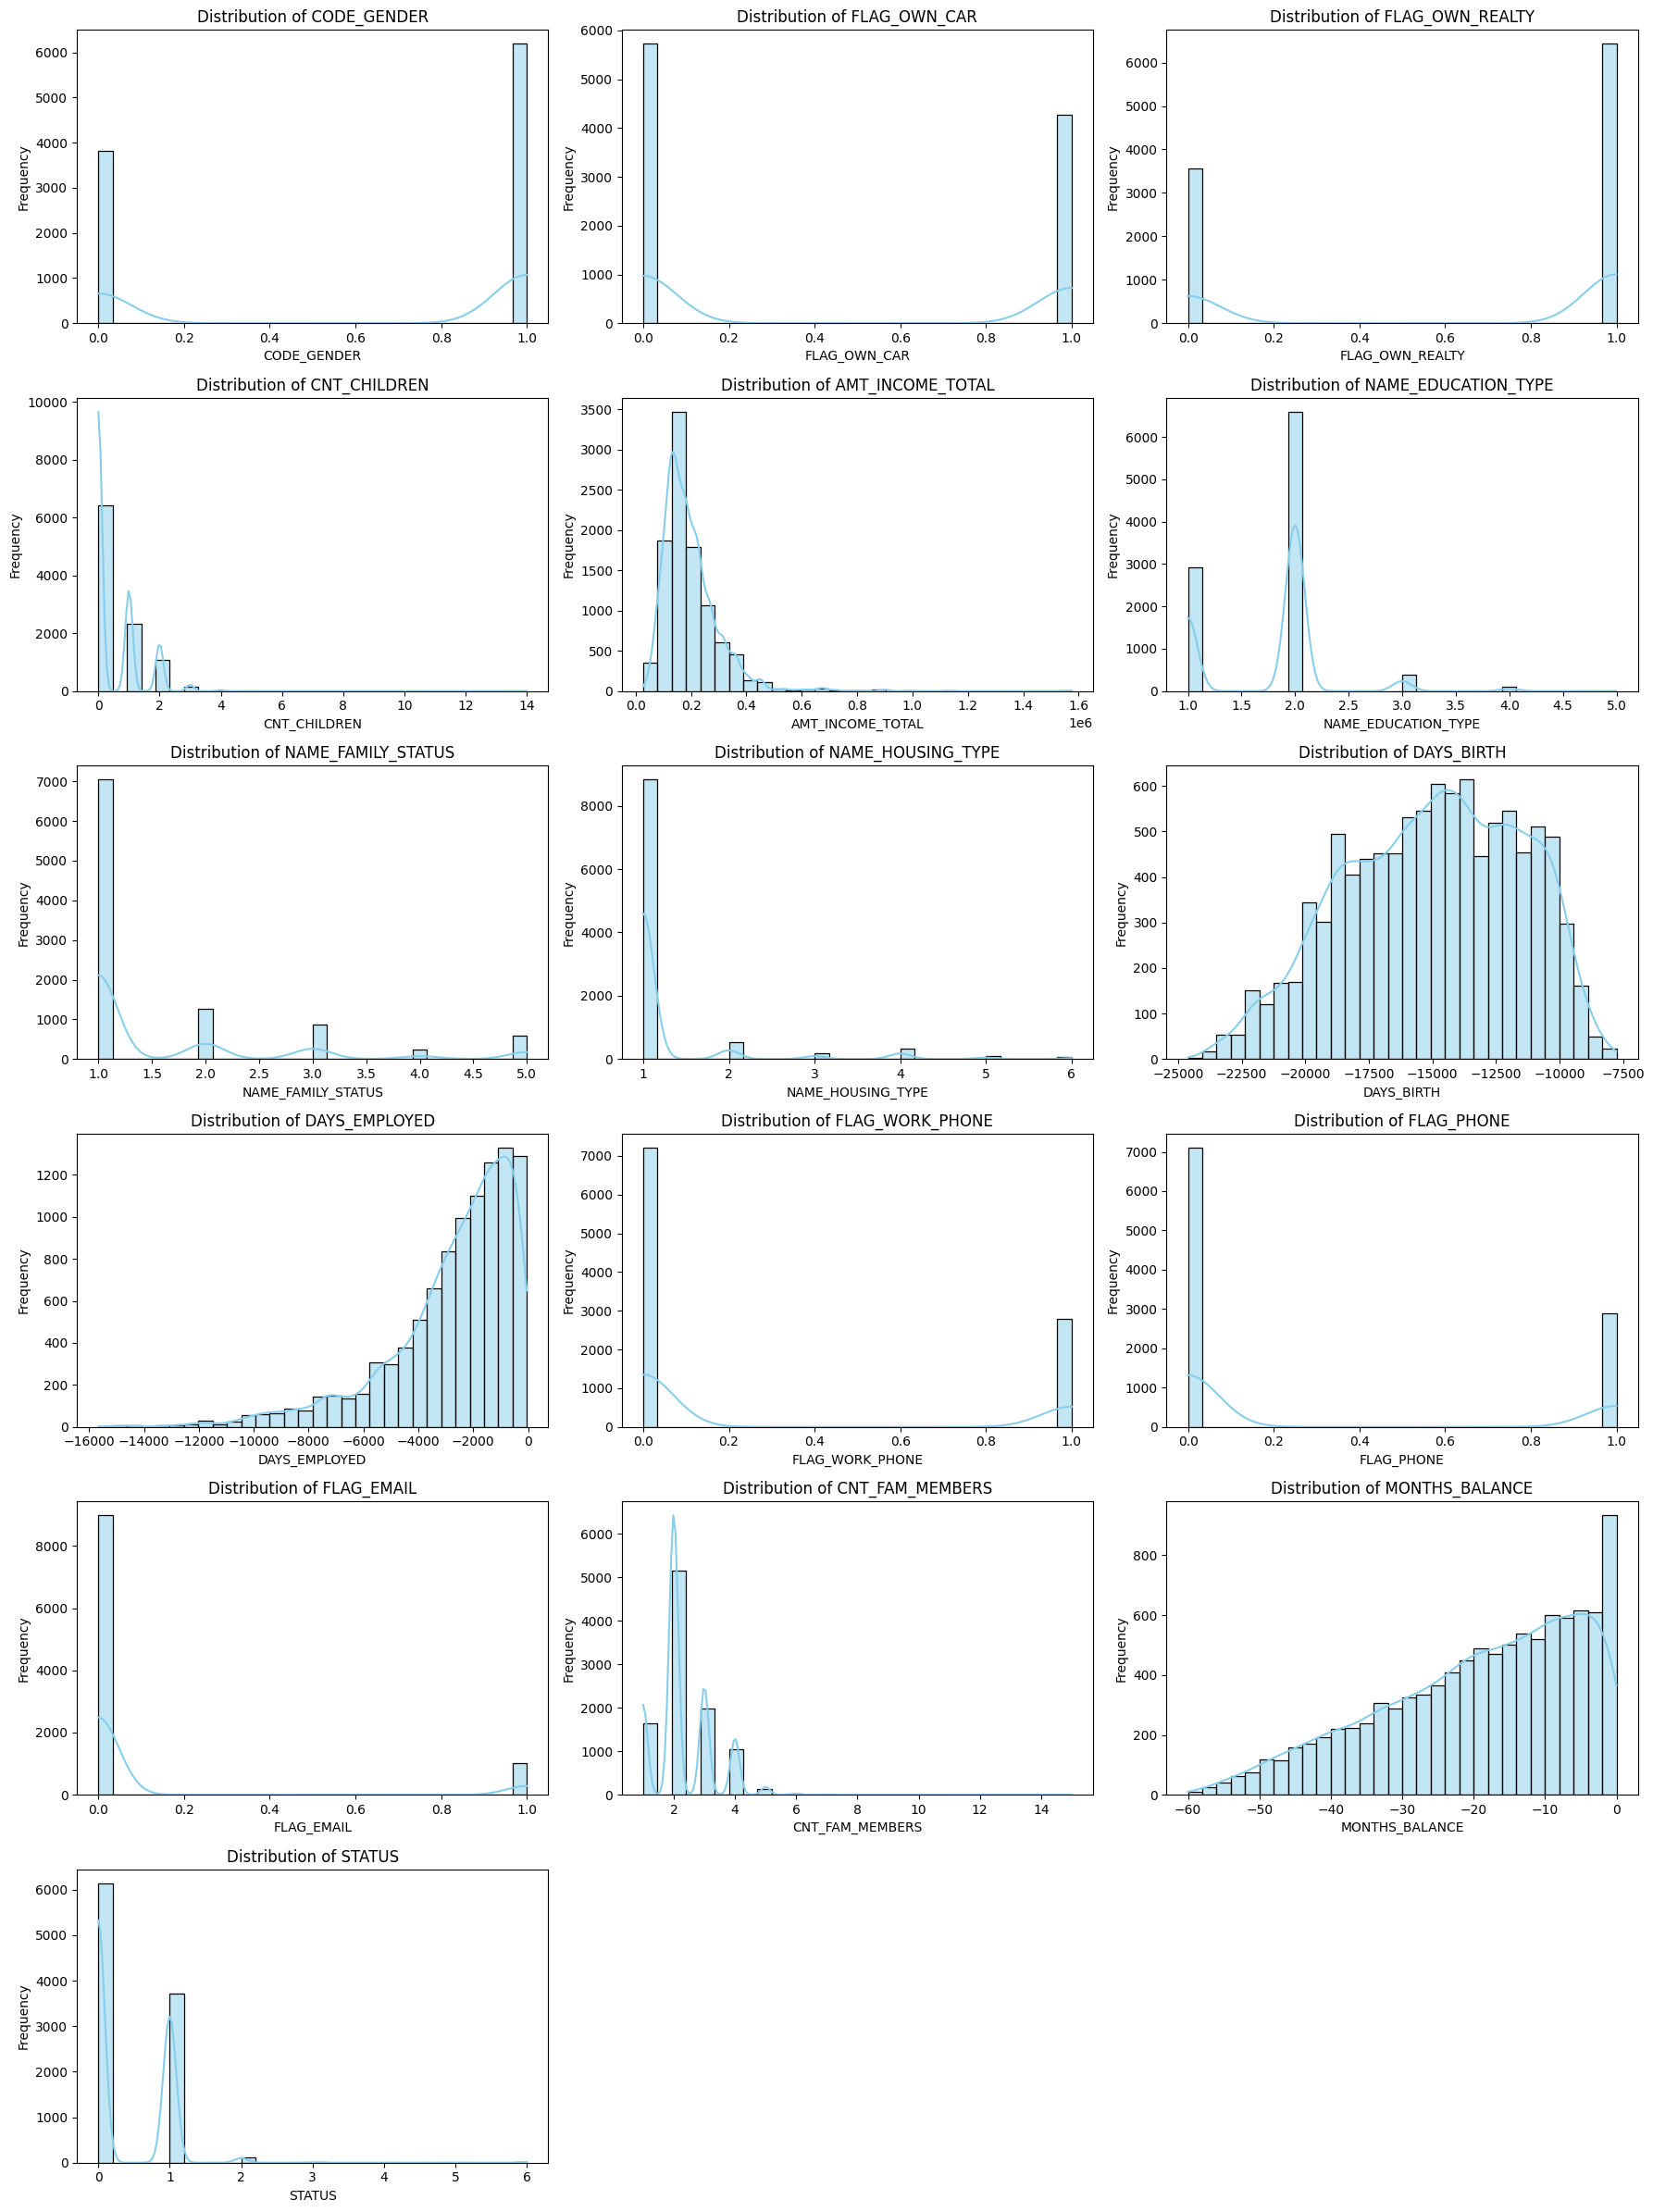

In [37]:
columns = data.columns
num_cols = len(columns)

fig, axes = plt.subplots(nrows=int(np.ceil(num_cols / 3)), ncols=3, figsize=(18, 4 * int(np.ceil(num_cols / 3))))
axes = axes.flatten()  

for i, column in enumerate(columns):
    ax = axes[i]
    
    if np.issubdtype(data[column].dtype, np.number):
        sns.histplot(data[column], ax=ax, kde=True, bins=30, color='skyblue')
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        sns.countplot(x=data[column], ax=ax, palette='pastel')
        ax.set_title(f'Frequency of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
## 1 Explore Data


### 1.1 Correlation between features

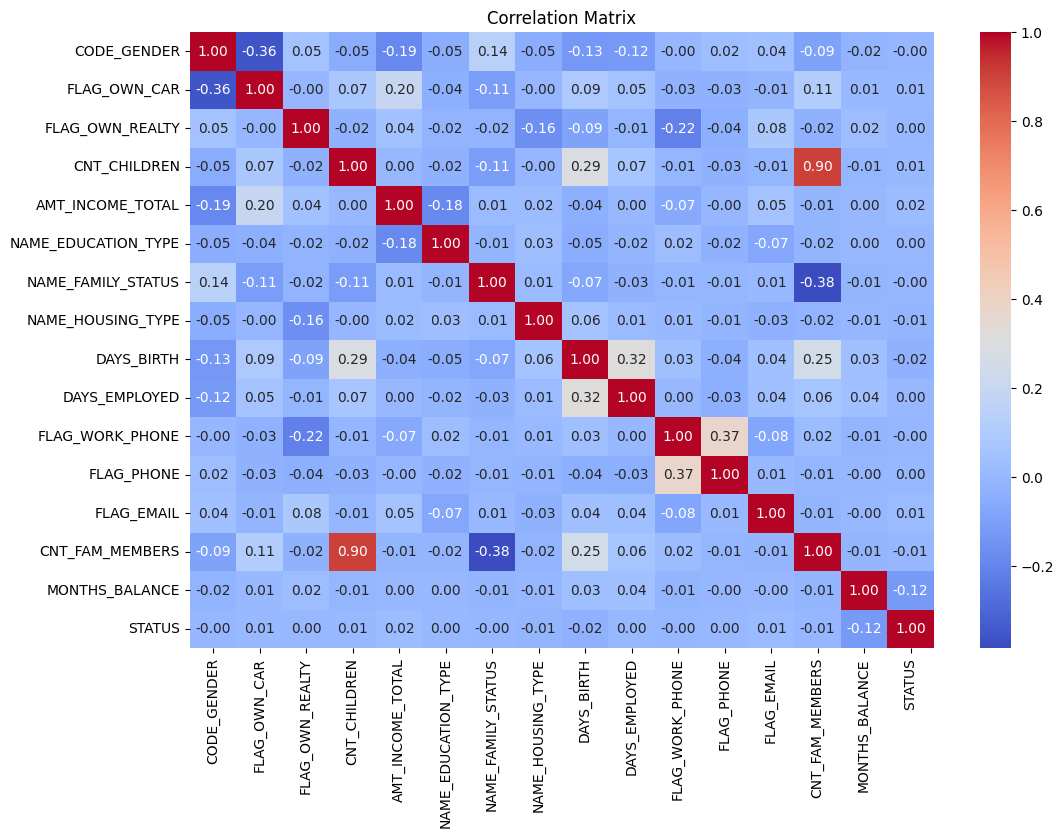

In [38]:
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

### 1.2 Impact on the target

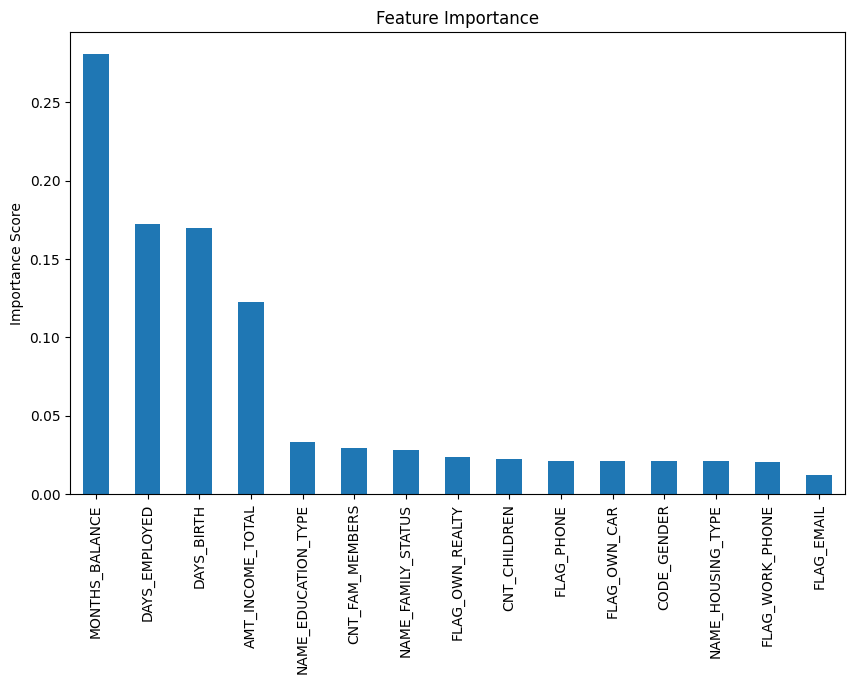

In [39]:
# We can estimate features impact by training a simple model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = data.drop(columns=['STATUS']) 
y = data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()


### 1.3 Independence assumption

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['DAYS_BIRTH'], data['STATUS'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test: p-value = ", p)
if p < 0.05:
    print("Features are not independent.")
else:
    print("Features are independent.")


Chi-squared Test: p-value =  3.092915327999291e-21
Features are not independent.


---
## 2 Visualization strategies


### 2.1 Correlation plot

Correlation with target ' STATUS ' :
CODE_GENDER           -0.004022
FLAG_OWN_CAR           0.007710
FLAG_OWN_REALTY        0.000862
CNT_CHILDREN           0.005644
AMT_INCOME_TOTAL       0.017453
NAME_EDUCATION_TYPE    0.001272
NAME_FAMILY_STATUS    -0.001060
NAME_HOUSING_TYPE     -0.013143
DAYS_BIRTH            -0.023547
DAYS_EMPLOYED          0.004821
FLAG_WORK_PHONE       -0.000617
FLAG_PHONE             0.003351
FLAG_EMAIL             0.012623
CNT_FAM_MEMBERS       -0.005200
MONTHS_BALANCE        -0.120515
STATUS                 1.000000
Name: STATUS, dtype: float64


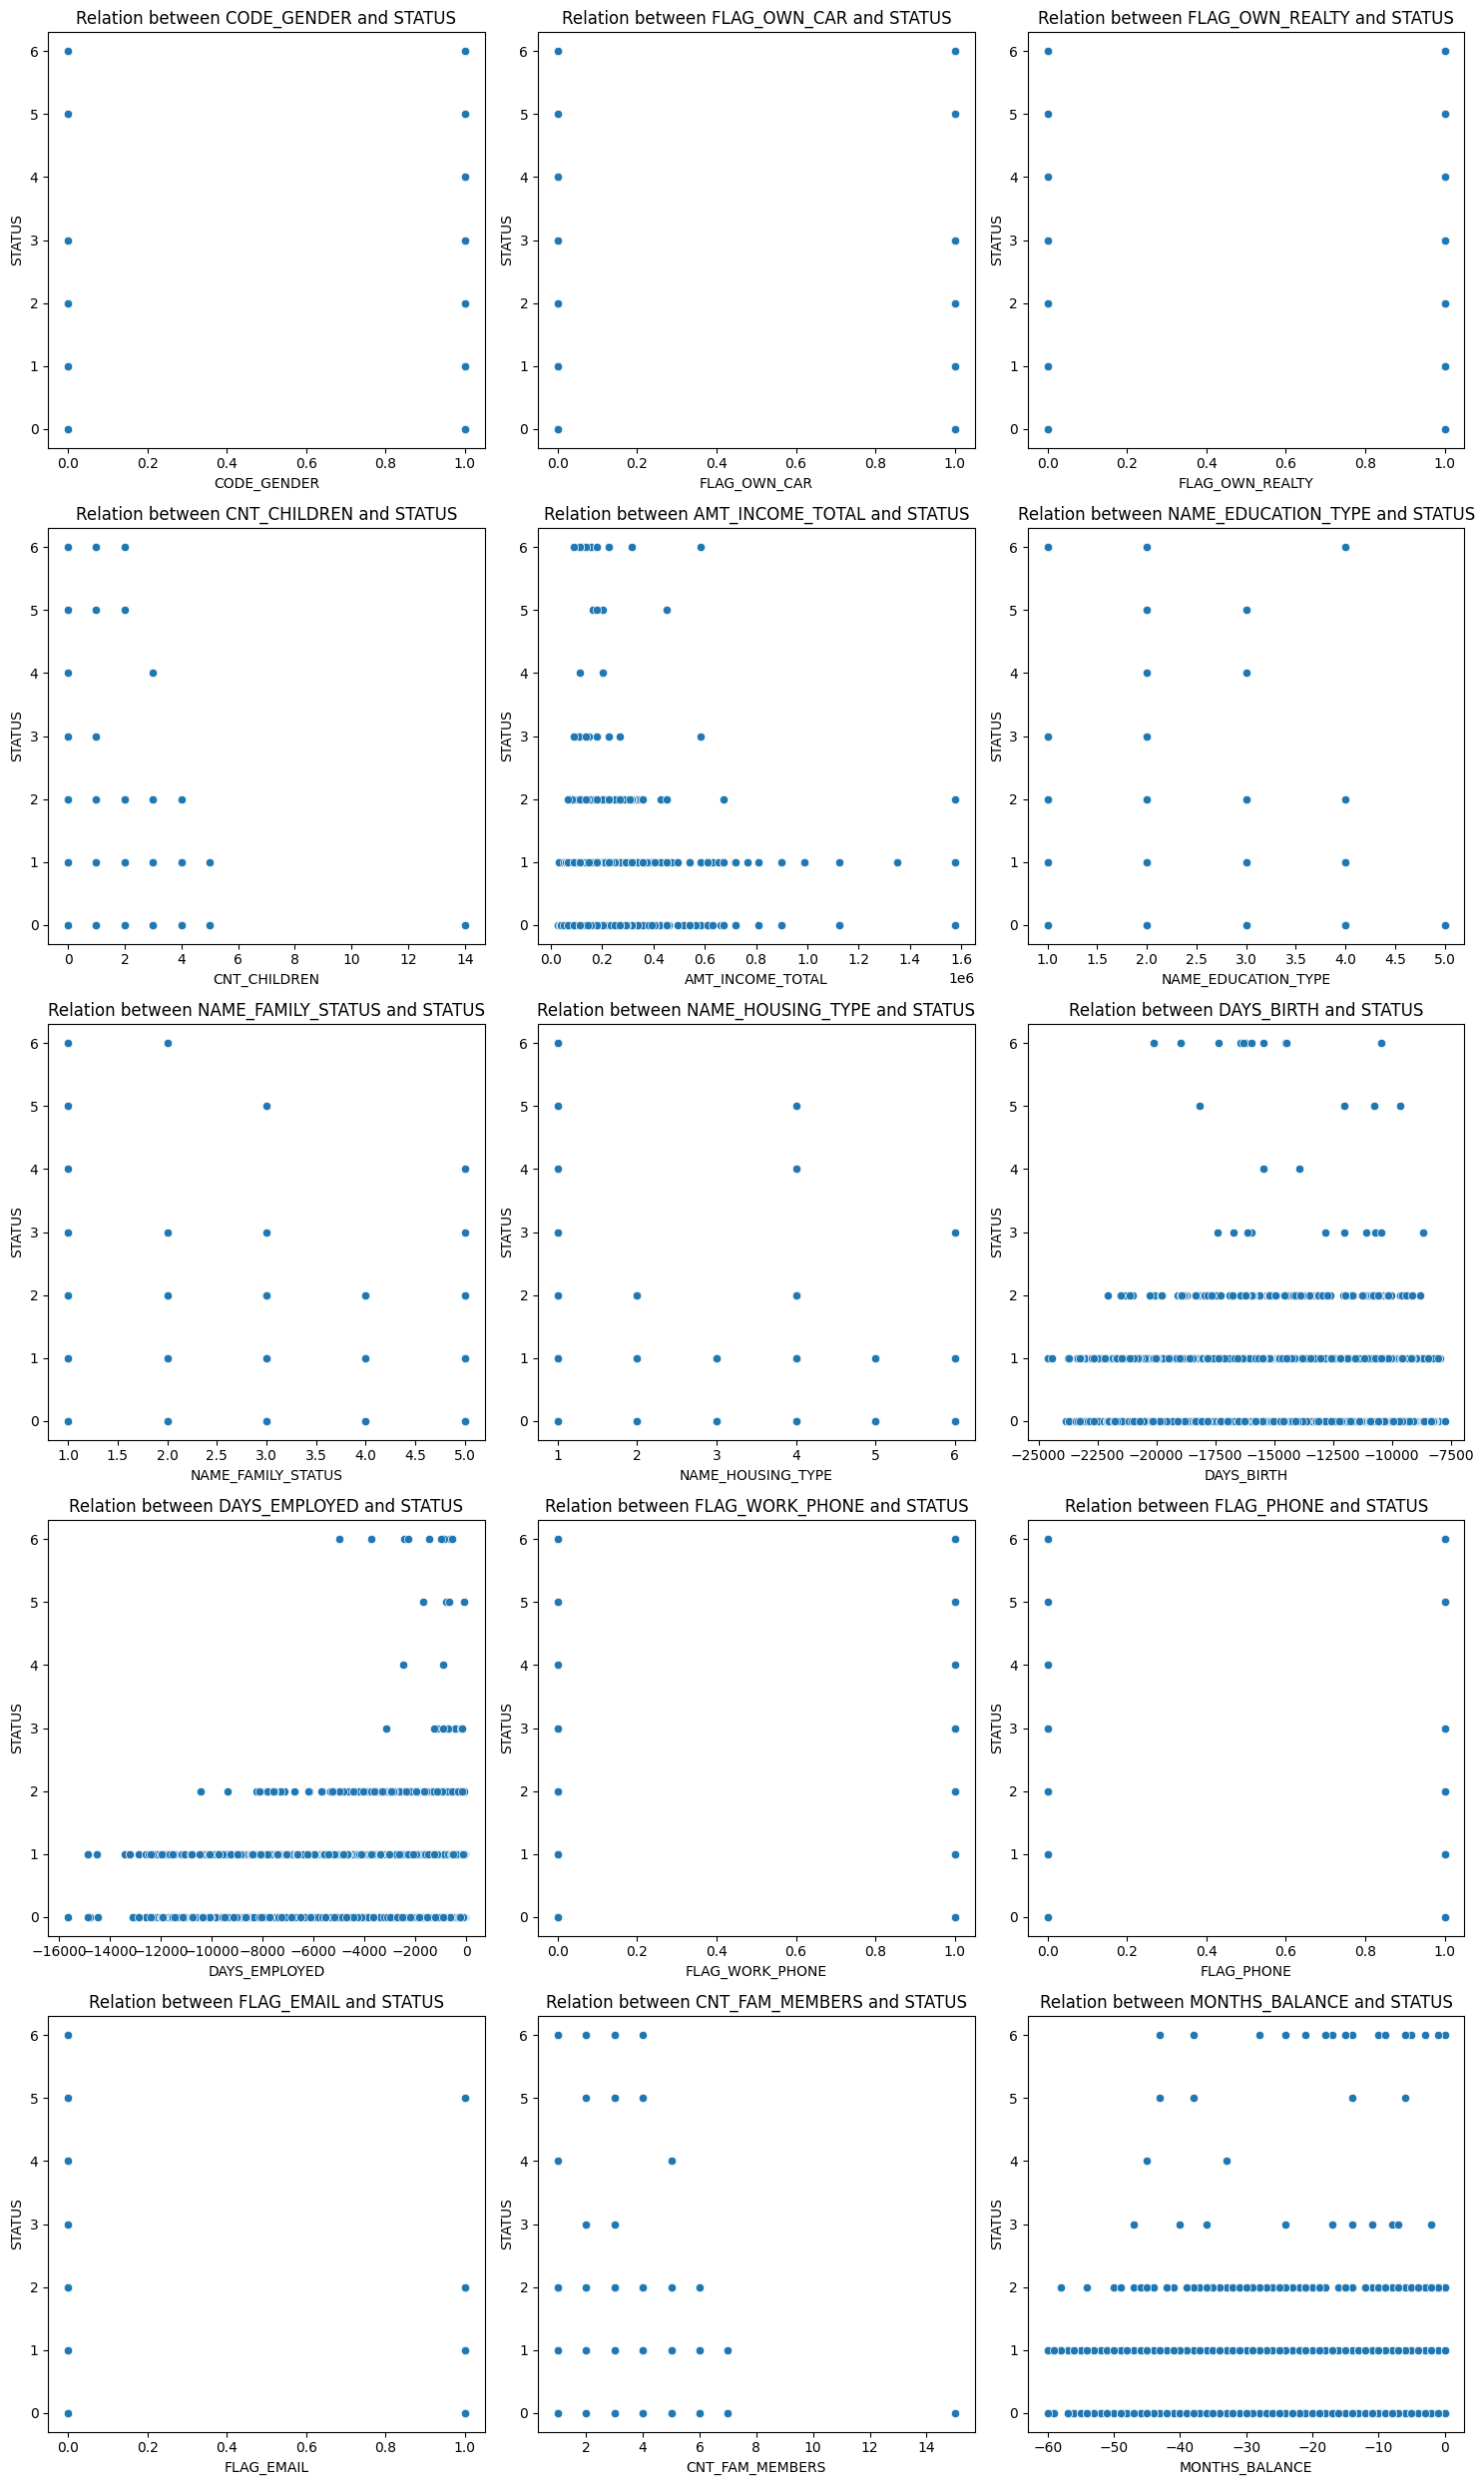

In [41]:
target_column = 'STATUS'

correlation_target = data.corr()[target_column]

print("Correlation with target '", target_column,"' :")
print(correlation_target)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_columns) - 1 
cols = 3  
rows = np.ceil(num_plots / cols).astype(int)

plt.figure(figsize=(cols * 5, rows * 5))

for i, column in enumerate(numeric_columns):
    if column != target_column: 
        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(data=data, x=column, y=target_column)
        plt.title(f'Relation between {column} and {target_column}')

plt.tight_layout()
plt.show()


### 2.2 PCA

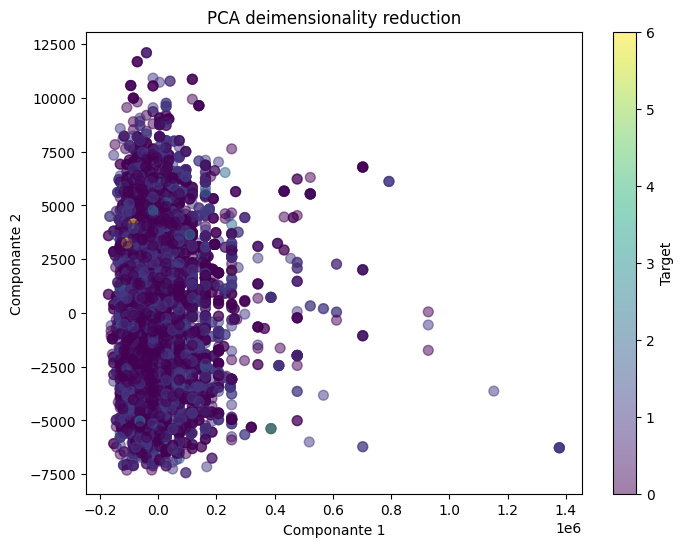

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']))

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['STATUS'], cmap='viridis', s=50, alpha=0.5)
plt.title('PCA deimensionality reduction')
plt.xlabel('Componante 1')
plt.ylabel('Componante 2')
plt.colorbar(label='Target')
plt.show()


### 2.3 UMAP

c:\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


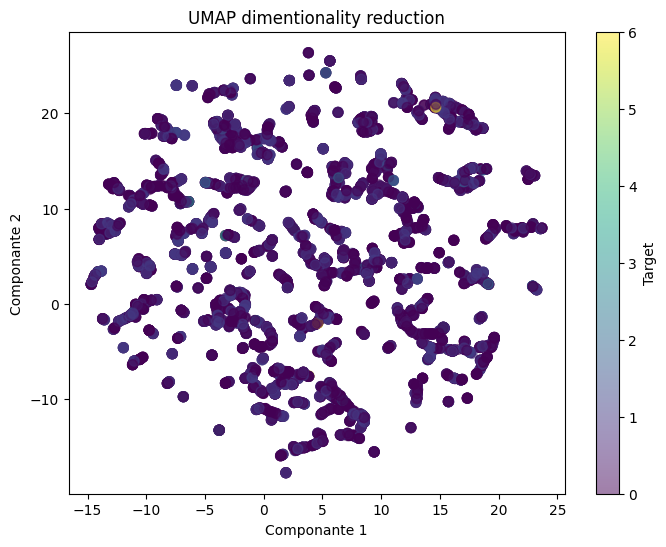

In [43]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=2)

umap_components = umap_model.fit_transform(data.select_dtypes(include=['float64', 'int64']))

plt.figure(figsize=(8, 6))
plt.scatter(umap_components[:, 0], umap_components[:, 1], c=data['STATUS'], cmap='viridis', s=50, alpha=0.5)
plt.title('UMAP dimentionality reduction')
plt.xlabel('Componante 1')
plt.ylabel('Componante 2')
plt.colorbar(label='Target')
plt.show()


### 2.4 T-SNE

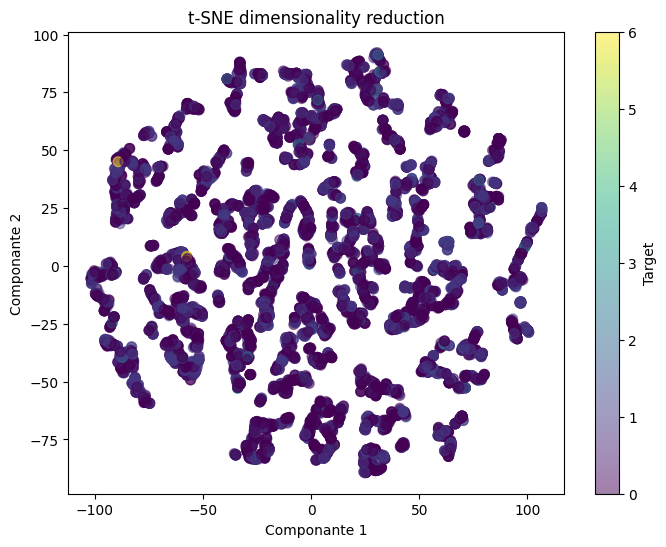

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(data.select_dtypes(include=['float64', 'int64']))

plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=data['STATUS'], cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE dimensionality reduction')
plt.xlabel('Componante 1')
plt.ylabel('Componante 2')
plt.colorbar(label='Target')
plt.show()


## 3 Explore data using unsupervised learning techniques

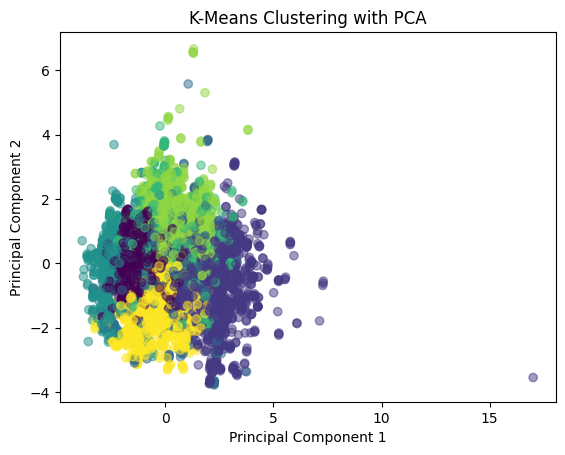

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numerical_features = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


## 4 Cross Validation strategy

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(scaled_data):
    train_data, test_data = scaled_data[train_index], scaled_data[test_index]

    kmeans = KMeans(n_clusters=7, random_state=42)
    kmeans.fit(train_data)

    test_clusters = kmeans.predict(test_data)
    score = silhouette_score(test_data, test_clusters)
    scores.append(score)

print("Silhouette Scores for Cross-Validation: ",scores)
print("Mean Silhouette Score: ",{np.mean(scores)})


Silhouette Scores for Cross-Validation:  [0.08518711667280139, 0.10102066111979742, 0.0875081997801321, 0.0827279467807841, 0.0893039610550859]
Mean Silhouette Score:  {0.08914957708172018}


## 5 Train simple model

In [47]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

X = data.drop(columns=['STATUS']) 
y = data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1246
           1       0.57      0.19      0.28       729
           2       0.08      0.04      0.06        23
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2

    accuracy                           0.63      2000
   macro avg       0.19      0.16      0.16      2000
weighted avg       0.61      0.63      0.58      2000



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5.1 Validation set for hyperparameters tuning and early stoping

In [48]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report

X = data.drop(columns=['STATUS'])
y = data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,  
    cv=2, 
    scoring='accuracy',
    random_state=42,
    verbose=2
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_test_pred = best_model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  12.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  11.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  13.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  13.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  22.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  23.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=  32.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=  32.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=  22.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=  23.0s
[CV

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMet

### 5.2 Analyse performances using cross validation

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

cv_results = cross_validate(
    best_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=scoring, 
    return_train_score=True
)

cv_df = pd.DataFrame(cv_results)
cv_summary = cv_df[['train_accuracy', 'test_accuracy', 'train_f1', 'test_f1']].describe()
print("Cross-Validation Results Summary:",cv_summary)


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter t

Cross-Validation Results Summary:        train_accuracy  test_accuracy  train_f1   test_f1
count        5.000000       5.000000  5.000000  5.000000
mean         0.648625       0.628500  0.576156  0.550885
std          0.001883       0.005165  0.003520  0.007033
min          0.645938       0.624375  0.573362  0.542099
25%          0.647500       0.625000  0.573607  0.548205
50%          0.649375       0.626250  0.573903  0.550595
75%          0.649687       0.630000  0.579141  0.552053
max          0.650625       0.636875  0.580769  0.561471


## 6 Ways to improve performance

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
    ('pca', PCA(n_components=10))
])

X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

random_search = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_dist, 
    n_iter=20, scoring='f1_weighted', cv=3, verbose=2, random_state=42
)
random_search.fit(X_transformed, y_train)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_transformed)
print("Test Set Performance:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   5.8s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   5.7s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   6.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   3.0s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   3.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   3.0s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   6.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   5.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   6.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.0s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=  16.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=  17.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=  18.2s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.8s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.0s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.2s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   4.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   4.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   4.5s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.5s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.5s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=   2.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=   2.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=   2.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.6; total time=   6.2s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.6; total time=   6.2s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.6; total time=   6.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.4s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.4s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   9.5s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   9.3s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   9.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.0s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   2.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.1s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   2.4s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   2.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   2.7s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.4s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.6s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.2s


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Performance:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1246
           1       0.51      0.37      0.43       729
           2       0.17      0.04      0.07        23
           6       0.00      0.00      0.00         2

    accuracy                           0.63      2000
   macro avg       0.34      0.30      0.31      2000
weighted avg       0.61      0.63      0.61      2000



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 7 More experiments

### 7.1 Neural networks

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


X = data.drop(columns=['STATUS'])
y = data['STATUS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  #or softmax
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Test Accuracy: ",accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/300
219/219 - 7s - loss: 0.7397 - accuracy: 0.5489 - val_loss: 0.6723 - val_accuracy: 0.6047 - 7s/epoch - 34ms/step
Epoch 2/300
219/219 - 2s - loss: 0.6941 - accuracy: 0.5781 - val_loss: 0.6701 - val_accuracy: 0.5960 - 2s/epoch - 9ms/step
Epoch 3/300
219/219 - 2s - loss: 0.6874 - accuracy: 0.5869 - val_loss: 0.6687 - val_accuracy: 0.6060 - 2s/epoch - 8ms/step
Epoch 4/300
219/219 - 2s - loss: 0.6781 - accuracy: 0.5921 - val_loss: 0.6622 - val_accuracy: 0.6187 - 2s/epoch - 9ms/step
Epoch 5/300
219/219 - 2s - loss: 0.6714 - accuracy: 0.5954 - val_loss: 0.6619 - val_accuracy: 0.6240 - 2s/epoch - 8ms/step
Epoch 6/300
219/219 - 2s - loss: 0.6730 - accuracy: 0.6013 - val_loss: 0.6593 - val_accuracy: 0.6273 - 2s/epoch - 8ms/step
Epoch 7/300
219/219 - 2s - loss: 0.6649 - accuracy: 0.6064 - val_loss: 0.6587 - val_accuracy: 0.6253 - 2s/epoch - 9ms/step
Epoch 8/300
219/219 - 2s - loss: 0.6687 - accuracy: 0.6034 - val_loss: 0.6585 - val_accuracy: 0.6153 - 2s/epoch - 8ms/step
Epoch 9/300
219

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


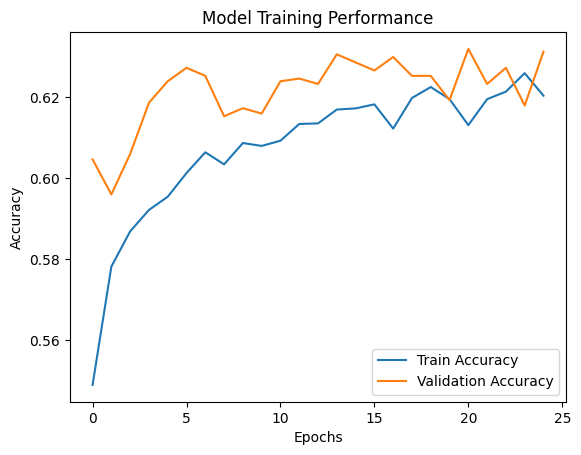

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training Performance')
plt.legend()
plt.show()


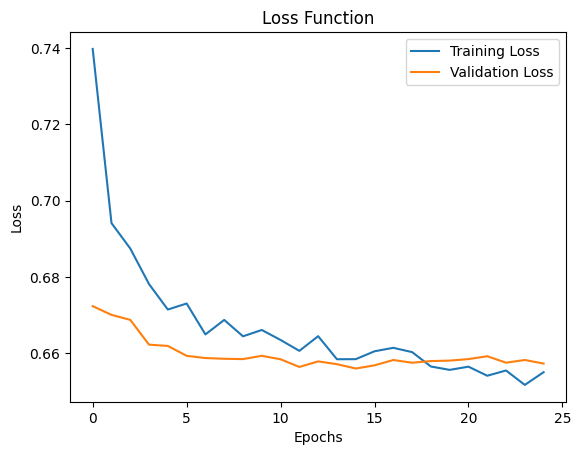

In [53]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.legend()
plt.show()


### 7.2 Stacked Ensemble Model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

X = data.drop(columns=['STATUS']) 
y = data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_learners = [
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
]

meta_model = LogisticRegression()

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)

stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.76      1246
           1       0.59      0.32      0.41       729
           2       0.00      0.00      0.00        23
           6       0.00      0.00      0.00         2

    accuracy                           0.66      2000
   macro avg       0.32      0.30      0.29      2000
weighted avg       0.64      0.66      0.63      2000



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
